<a href="https://colab.research.google.com/github/khaireddine-satouri/Apprentissage/blob/master/Predicting_Material_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data preprocessing


1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Data Sheet 1.CSV')

In [3]:
dataset.head()

,D[-],D_dot[1/s],p[-],p_dot[1/s],Mises[MPa],Hydro[MPa],teq[-],eeq[-],V[mm^3],Sig_tri[-],LoadingState
0,0.0,0.0,9.391282e-17,0.000000,85.145644,-55.225610,0.000398,0.000398,0.000212,-0.696101,0.0
1,0.0,0.0,9.961853e-04,0.101083,289.572276,-185.683183,0.002245,0.001374,0.000212,-0.661465,0.0
2,0.0,0.0,1.691085e-03,0.108455,297.032533,-189.018356,0.002933,0.001407,0.000212,-0.657263,0.0
3,0.0,0.0,2.749834e-03,0.110162,304.274765,-191.790780,0.003986,0.001436,0.000212,-0.651724,0.0
4,0.0,0.0,4.339816e-03,0.110291,311.348519,-194.386174,0.005577,0.001463,0.000212,-0.646000,0.0


In [4]:
dataset.shape

(3454, 11)

## Exploratory Data Analysis

In [5]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   D[-]          3454 non-null   float64
 1   D_dot[1/s]    3454 non-null   float64
 2   p[-]          3454 non-null   float64
 3   p_dot[1/s]    3454 non-null   float64
 4   Mises[MPa]    3454 non-null   float64
 5   Hydro[MPa]    3454 non-null   float64
 6   teq[-]        3454 non-null   float64
 7   eeq[-]        3454 non-null   float64
 8   V[mm^3]       3454 non-null   float64
 9   Sig_tri[-]    3454 non-null   float64
 10  LoadingState  3454 non-null   float64
dtypes: float64(11)
memory usage: 297.0 KB


In [6]:
# statistical summary
dataset.describe()

,D[-],D_dot[1/s],p[-],p_dot[1/s],Mises[MPa],Hydro[MPa],teq[-],eeq[-],V[mm^3],Sig_tri[-],LoadingState
count,3454.000000,3454.000000,3.454000e+03,3.454000e+03,3454.000000,3454.000000,3454.000000,3454.000000,3.454000e+03,3454.000000,3454.000000
mean,0.022044,0.202148,8.915755e-02,9.998580e-02,357.035431,-58.228565,0.090448,0.001547,2.122427e-04,-0.167104,4.255356
std,0.058562,0.552446,7.837314e-02,4.317598e-02,26.806791,132.861773,0.078561,0.000180,1.851914e-07,0.382583,2.503214
min,0.000000,0.000000,9.391282e-17,-8.918949e-16,50.927819,-240.775116,0.000207,0.000207,2.116625e-04,-0.719907,0.000000
25%,0.000000,0.000000,3.236634e-02,6.157397e-02,344.624035,-212.096001,0.033543,0.001436,2.120458e-04,-0.629760,2.000000
50%,0.000000,0.000000,6.656345e-02,1.032427e-01,359.924413,-99.035954,0.067826,0.001518,2.123001e-04,-0.296705,5.000000
75%,0.002043,0.035419,1.153874e-01,1.222835e-01,375.132925,77.563137,0.116831,0.001684,2.124467e-04,0.275957,6.000000
max,0.388419,13.020825,3.439621e-01,9.381295e-01,392.998653,134.468105,0.346638,0.002329,2.126532e-04,0.398155,8.000000


## Dealing with the missing data

In [7]:
# check if there are any null values
dataset.isnull().values.any()

False

In [8]:
# check how many null values
dataset.isnull().values.sum()

0

## Data visualisation 


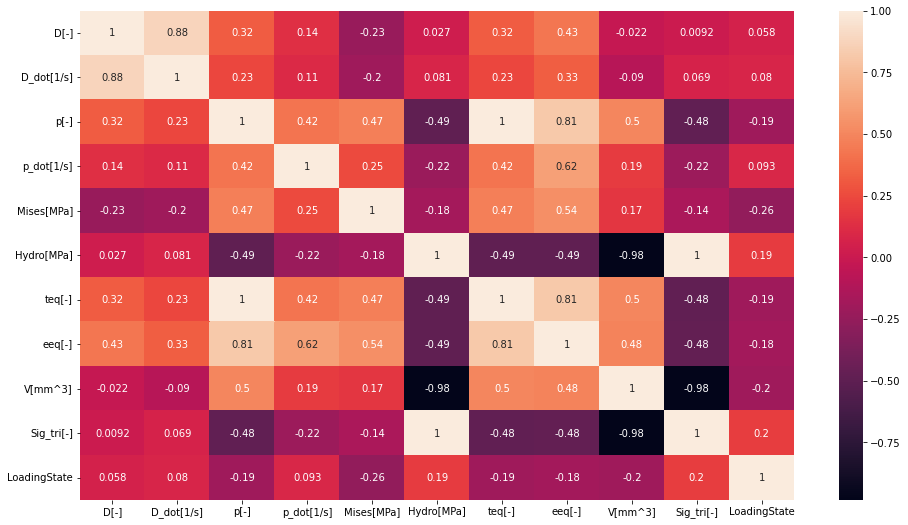

In [9]:
# Create Correlation Matrix
corr = dataset.corr()
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

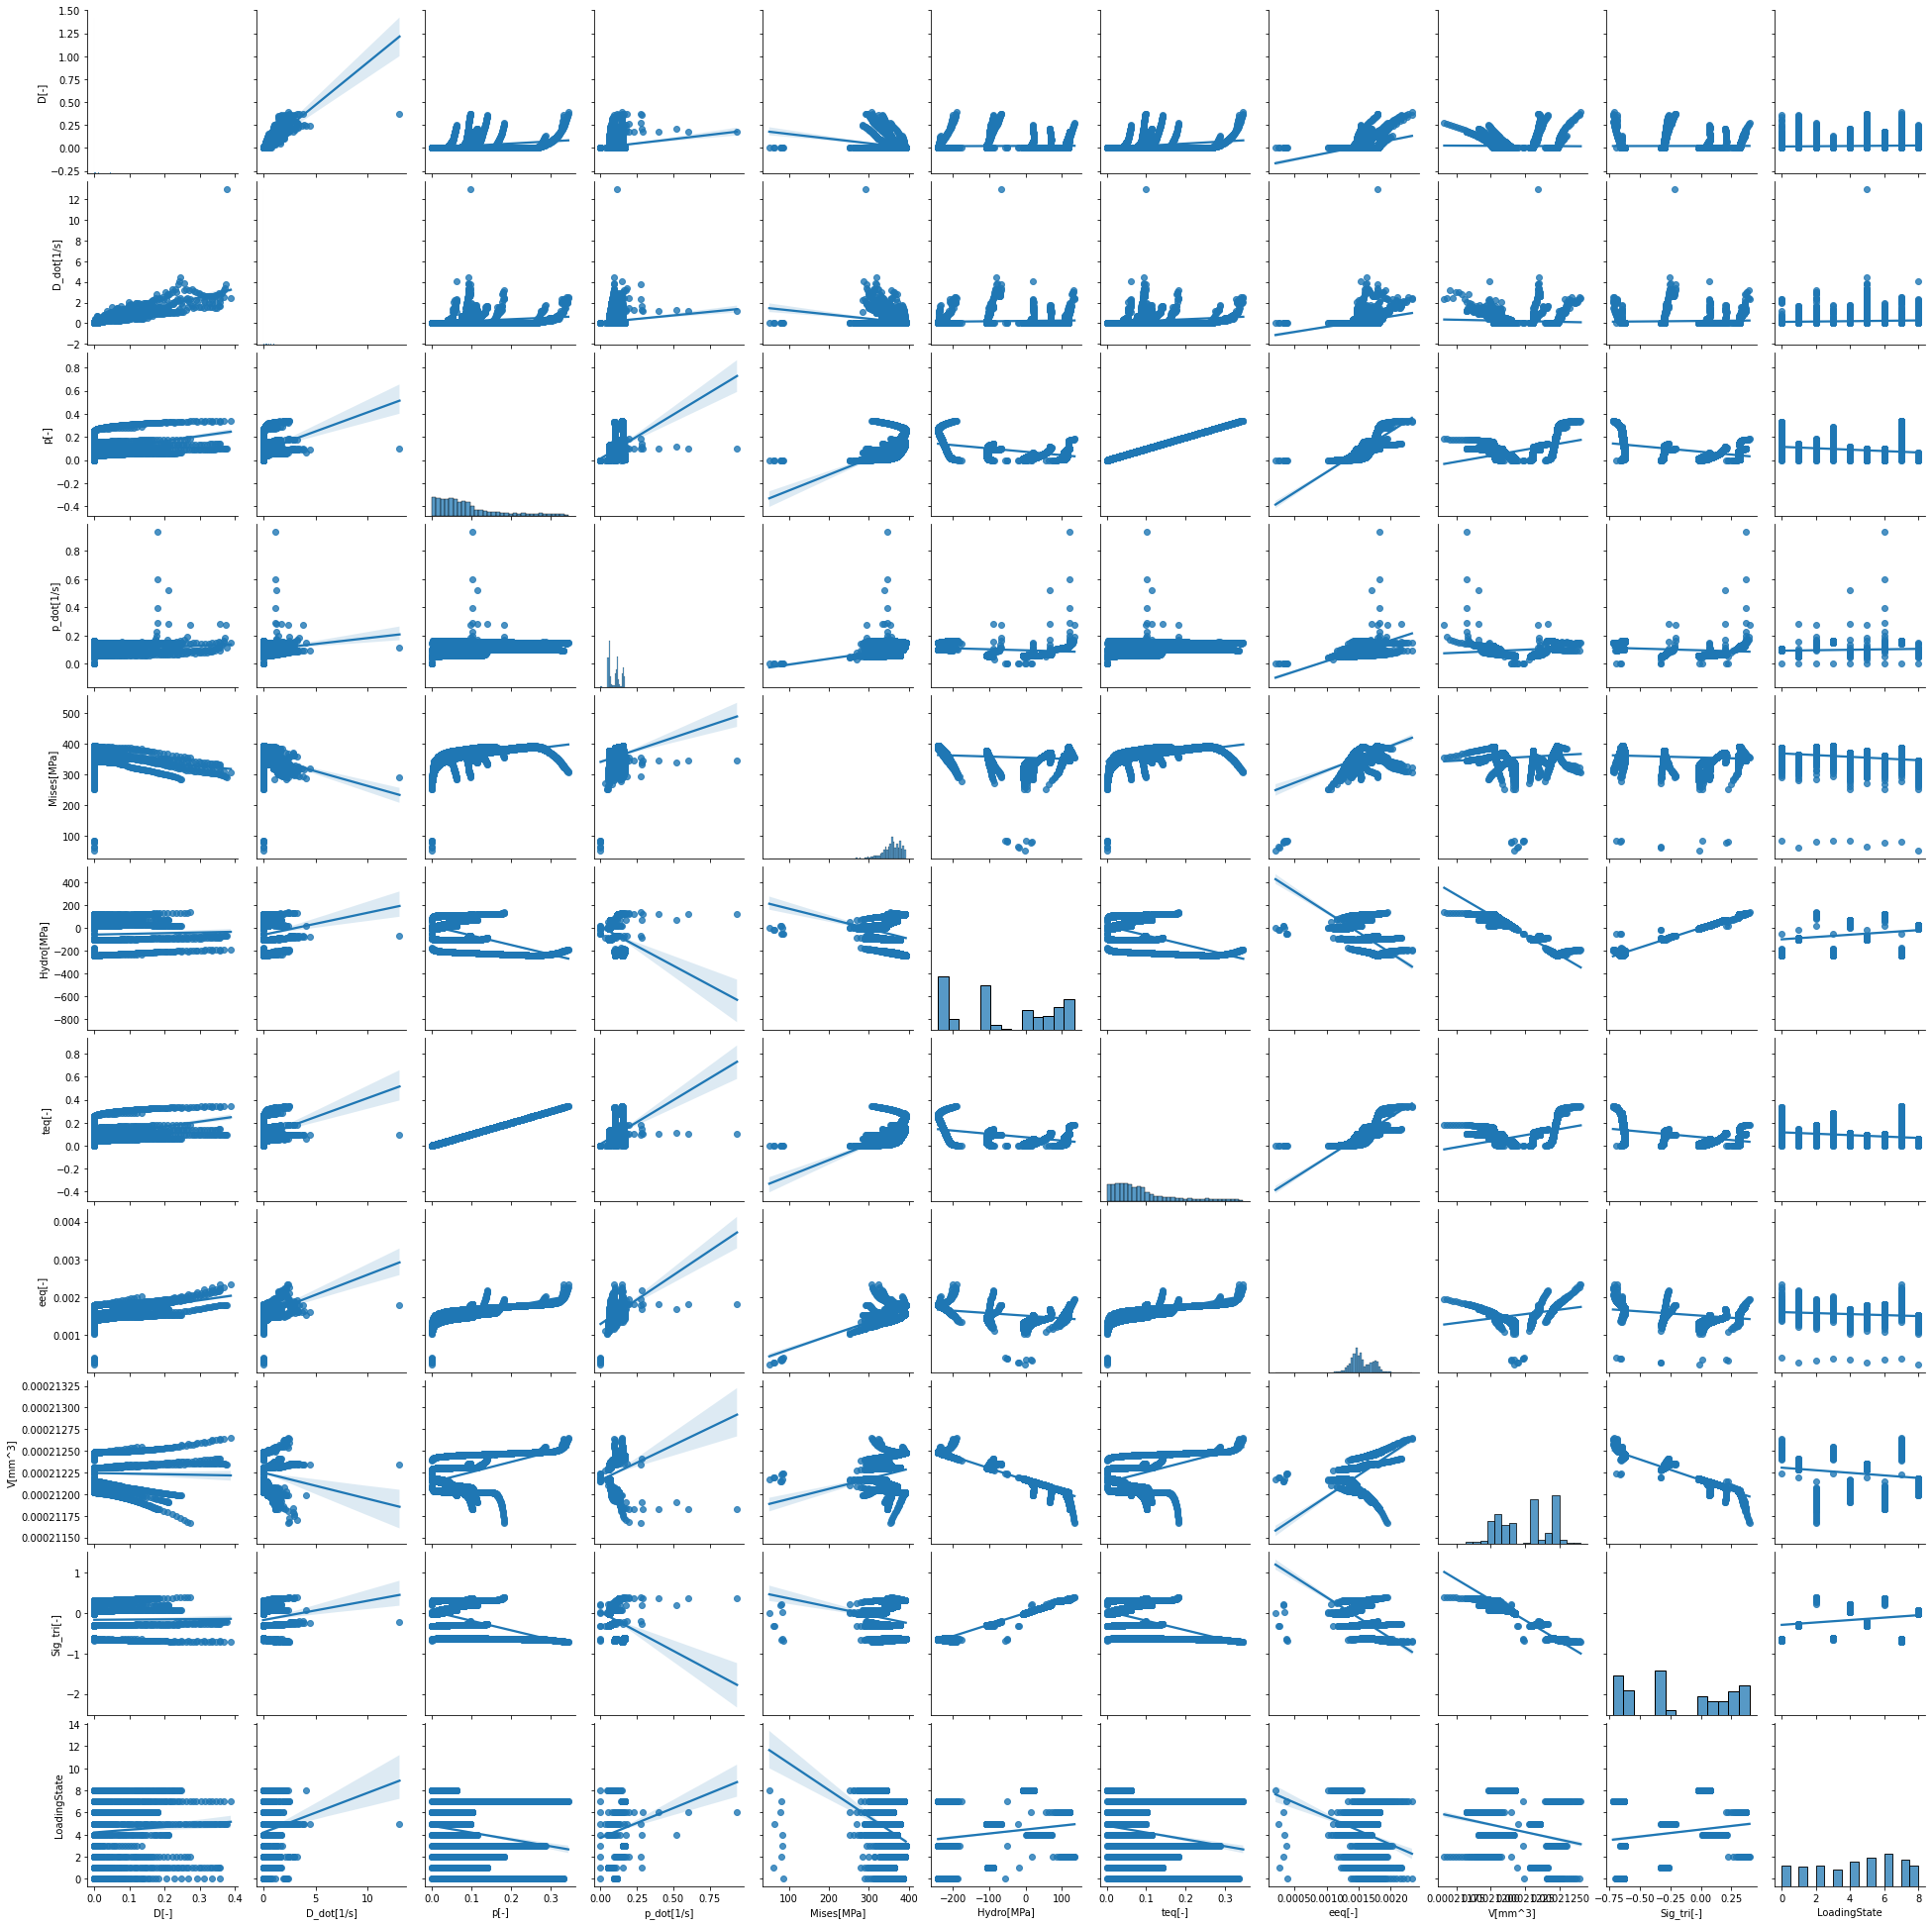

In [10]:
sns.pairplot(dataset, kind="reg")

https://www.frontiersin.org/articles/10.3389/fmats.2019.00181/full <br>
**Comment from section 4.2 before implementing the models** : The conducted feature importance results in the damage parameter being the most informative feature with a validation score of 89.37%. This leaves the importance of all other features to around 10% in total with 3.4% for the hydrostatic stress being the second most relevant feature, and the plastic strain rate the least important feature with 0.9%. Selecting half of the most important features (D, σvM, σhyd, ϵeqt
) produces a validation score of about 94.58%. One can see that the damage parameter and the stresses seem to be the most relevant, based on feature importance. For the RFR, selecting only the most relevant features (D, σvM, σhyd, ϵeqt) leads to better results than other feature combinations. In contrast, these input parameters induce a lower accuracy for the SVR. Choosing the same features for SVR as chosen for RFR, results in a training score of just about 77.6% and a test score of 82.2%. Both score values are below acceptance. The SVR cannot extract enough information from the given features to approximate the damage rate sufficiently. Therefore, leaving out features causes an under-fitting problem so that all features are used: D, p, p˙, σvM, σhyd, ϵeqt, ϵeqe


## SVR and RFR without using learning curves and cross-validation

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score



# Split the data set into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(dataset.drop("D_dot[1/s]", axis=1), dataset["D_dot[1/s]"], test_size=0.25, random_state=666)

# Split the training set into validation and training sets
val_data, train_data, val_target, train_target = train_test_split(train_data, train_target, test_size=0.2, random_state=666)

# Train the SVR model
svr = SVR(kernel='linear', C=1, epsilon=0.1)
svr.fit(train_data, train_target)

# Make predictions using the SVR model
svr_predictions = svr.predict(val_data)

# Calculate the R2 score for the SVR model
svr_r2_score = r2_score(val_target, svr_predictions)
print("SVR R2 score:", svr_r2_score)

# Train the Random Forest Regression model
rfr = RandomForestRegressor(n_estimators=100, random_state=666)
rfr.fit(train_data, train_target)

# Make predictions using the Random Forest Regression model
rfr_predictions = rfr.predict(val_data)

# Calculate the R2 score for the Random Forest Regression model
rfr_r2_score = r2_score(val_target, rfr_predictions)
print("Random Forest Regression R2 score:", rfr_r2_score)

SVR R2 score: 0.6406043702554697
Random Forest Regression R2 score: 0.7902061130482876


## training RFR model using learning curves and cross-validation

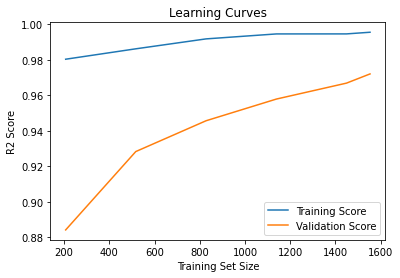

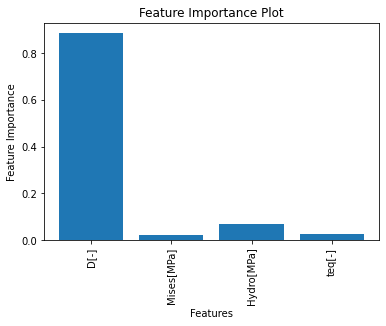

Test R2 Score: 0.9518744552539058


In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt



# Randomize the data and set a constant random state for reproducibility
np.random.seed(666)
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing sets
X = dataset.drop(["D_dot[1/s]","p[-]","p_dot[1/s]","eeq[-]","V[mm^3]","Sig_tri[-]","LoadingState"], axis=1)
y = dataset["D_dot[1/s]"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Train the Random Forest Regressor with default parameters
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Plot learning curves to assess the sufficiency of the number of data points
train_sizes, train_scores, val_scores = learning_curve(
    rfr, X_train, y_train, train_sizes=np.array([207, 517, 828, 1139, 1449, 1553]), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curves")
plt.show()

# Calculate feature importance
importances = rfr.feature_importances_

# Plot the feature importances in a bar plot
features = X.columns
plt.bar(features, importances)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.xticks(rotation=90)
plt.show()

# Use the final model to predict on the test set and evaluate the accuracy
y_pred = rfr.predict(X_test)
r2_score = rfr.score(X_test, y_test)
print("Test R2 Score:", r2_score)


## training SVR model using learning curves and cross-validation

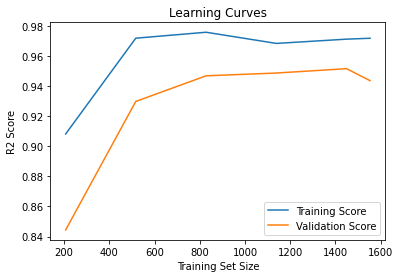

Test R2 Score: 0.9367881124065762


In [14]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data into a pandas dataframe
df = pd.read_csv("Data Sheet 1.CSV")

# Randomize the data and set a constant random state for reproducibility
np.random.seed(666)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing sets
X = df.drop("D_dot[1/s]", axis=1)
y = df["D_dot[1/s]"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Define the parameters for GridSearchCV
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

# Train the SVR using GridSearchCV
svr = GridSearchCV(SVR(), param_grid, cv=5)

svr.fit(X_train, y_train)


# Plot learning curves to assess the sufficiency of the number of data points
train_sizes, train_scores, val_scores = learning_curve(
    svr, X_train, y_train, train_sizes=np.array([207, 517, 828, 1139, 1449, 1553]), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curves")
plt.show()

# Use the final model to predict on the test set and evaluate the accuracy
y_pred = svr.predict(X_test)
r2_score = svr.score(X_test, y_test)
print("Test R2 Score:", r2_score)


In [ ]:
# Get the predicted damage rate and the reference damage rate
#y_pred = rfr.predict(X_test)
#y_ref = y_test

# Plot the predicted damage rate vs the reference damage rate
#plt.scatter(y_pred, y_ref)
#plt.xlabel("Predicted damage rate")
#plt.ylabel("Reference damage rate")
#plt.title("Predicted vs Reference Damage Rate")
#plt.plot([y_ref.min(), y_ref.max()], [y_ref.min(), y_ref.max()], 'k--', lw=2)
#plt.show()